# Data Science Online
## Part V: Categorizing Data

<img src="images/ab_test.PNG" style="width: 900px; height: 250px;" />


### Table of Contents

1 - [Tables II: Categorizing Data](#section1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a - [Groups](#subsection1a)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b - [Visualization: Bar Plots](#subsection1b)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c - [Pivots](#subsection1c)




In [17]:
# dependencies
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from scripts.exec_ed_scripts import *

plt.style.use('fivethirtyeight')

In the previous notebook, we learned some basic Python and Table operations and applied them to the Rocket Fuel data to answer questions about the profitability of the ad campaign. 

Here, we'll build on those previous skills to dive deeper into the Rocket Fuel case. We'll explore questions including:

- How did conversions relate to different *hours of the day* and *days of the week*?
- How did the *total number of ads seen* relate to how often users converted?
- Was the difference in conversion proportions between the experimental and control groups *statistically significant*?

To answer these questions, we'll need to know a few additional Table operations.

# 1. Tables II: Categorizing Data <a id='section1'></a>

As a reminder, our data looks like this:

In [2]:
# load the rocket fuel data
ads = pd.read_csv('https://raw.githubusercontent.com/ds-modules/exec_ed/master/data/rocketfuel_data_renamed.csv', index_col=0)

# display the first ten rows
ads.head()

,test group,converted,total ads,most ads day,most ads hour
user id,,,,,
1069124,ad,0,130,1:Mon,20
1119715,ad,0,93,2:Tues,22
1144181,ad,0,21,2:Tues,18
1435133,ad,0,355,2:Tues,10
1015700,ad,0,276,5:Fri,14


This Table shows the conversion behavior of each user in the study. But, we're not interested in individual user behavior right now- we want to know the behavior of *all users in a specific category*, like everyone who saw the most ads on a Monday, or everyone who saw 200 ads in total.

In this section, we'll talk about:
1. The definition of **categorical data**
2. How to use Table functions to **group data into categories**
3. Using **visualizations** to view and compare categories



Let's say we have data about some of the handbags TaskBella sells, including the color, price, and rating for each collected from different stores.

In [3]:
# create the example handbag data Table
handbags = pd.DataFrame(data={"color":["black", "red", "red", "brown", "black"],
                               "price":[115.99, 130, 124.95, 144.99, 120.05],
                               "rating":[4, 4, 5, 3, 4]})
handbags

,color,price,rating
0,black,115.99,4
1,red,130.00,4
2,red,124.95,5
3,brown,144.99,3
4,black,120.05,4


#### Data Types: Numerical and Categorical
This table has two different types of data: **numerical** and **categorical**.

Price and rating are **numerical**: they have numbers for values, and we can order those values along a scale from least to most.

Color is **categorial**: it has strings (text) for values, and those values can't really be ordered from least to most.

The type of data affects the kind of analysis we can do, in addition to how we visualize it. For now, we're going to focus on categorical data.



### 1a. Groups <a id='subsection1a'></a>

A question we might ask is how price or rating is different for different categories of color. To conduct this analysis, we want to do something like this:

1. Find all the possible colors
2. Sort all the rows of the Table into groups, one for each unique color
3. Return a new Table with one row for each color and information about that color of bag

To use `group`, call it on a Table using dot notation and specify which column you want to group on as the argument.

In [5]:
# group by handbag color
handbags.groupby("color").count()

,price,rating
color,,
black,2,2
brown,1,1
red,2,2


By default, `group` gives back a two-column Table where the first column contains all the unique colors (the column we grouped by) and the second column gives the counts of how many handbags had each color.

<br/>
<div class="alert-warning">
    <b>EXERCISE:</b> Use `group` to group the handbags by `"rating"`.
    <div>

In [ ]:
# group by rating
handbags.groupby(...).count()

We can also ask `group` to tell us different things about the different color handbags by specifying a `collect` function. The `collect` function specifies what we want to know about the price and rating for each color of handbag.

For example, if we want to know the average price and average rating of each color of handbag, we can add `np.average` as an argument.

In [7]:
# get average price and rating per color
bag_avgs = handbags.groupby("color").mean()
bag_avgs

,price,rating
color,,
black,118.020,4.0
brown,144.990,3.0
red,127.475,4.5


A picture might help to understand what just happened.

<img src="images/group_ex.png" style="width: 1000px; height: 400px;" />

<br/>

<div class="class alert-warning">
<b>EXERCISE:</b> You can set `collect` to be a wide variety of reduction functions, including built-in functions `sum`, `min`, and `max`, or functions from the Numpy array package `np.mean`, and `np.median`.

Using `group`, group the handbags by color and find the minimum price and rating for each group.
</div>

In [ ]:
# fill in the ... with the correct code
handbags.groupby(...).average()

You can also group by multiple columns. Multiple columns are given to `group` in a **list**. A list is a sequence of data, similar to an array. Lists hold data between two square brackets, separated by commas. The resulting Table will have one row for each *combination* of unique values in the two columns. 

For example, when we group by handbag color and rating we get 4 rows:
- one for brown bags, since there's only one brown bag
- one for black bags, since both black bags have the same rating
- two for red bags, since each red bag has a different rating

In [10]:
# group by color and rating
handbags.groupby(["color", "rating"]).mean()

price
color rating        
black 4       118.02
brown 3       144.99
red   4       130.00
      5       124.95

<div class="alert alert-info">
**Collection functions and data types:**
The collect function you use must also work on the type of data in your rows for each group. For example, if you try to reduce using `np.average` to get the average value and your rows include text data, you will get an error since the computer doesn't know how to take the average of a word.*

</div>

### 1b. Visualization: Bar Plots <a id="subsection1b"></a>

Tables provide great ways to organize and display data. But as data sets grow very large (i.e. thousands, tens of thousands, even millions of rows), it becomes harder and harder to understand what's going on with the data just by looking at it in a table.

*Visualizations* are helpful to:
- get a big-picture understanding of a data set
- compare two or more variables
- find the variance of a variable

and much more.

Let's look again at the table we just made containing the average price and rating for each color.

In [11]:
bag_avgs

,price,rating
color,,
black,118.020,4.0
brown,144.990,3.0
red,127.475,4.5


One of the best ways to visualize categorical data is with a **bar plot**. Bar plots allow us to compare multiple categories within the same plot. 

Tables have a method to make horizontal bar plots called `barh`. `barh` takes two arguments: the name of the column with the categories, and the name of the numerical variable you want to visualize.

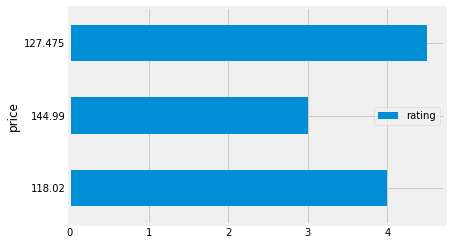

In [25]:
# create a bar plot of color versus average price
%matplotlib inline
bag_avgs.plot.barh("price")


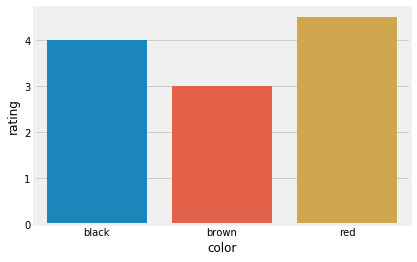

In [28]:
import seaborn as sns
sns.barplot(x="color", y="rating", data=bag_avgs.reset_index())

Each cateogory is listed on the vertical axis and represented by a bar. The length of each bar is the average price.

#### References

- Rocket Fuel data and discussion questions adapted from materials by Zsolt Katona and Brian Bell, BerkeleyHaas Case Series
- "For loop" section adapted from materials by Kelly Chen at [UC Berkeley Data Modules](https://github.com/ds-modules/core-resources)

Author: Keeley Takimoto